# Desafío - Gráficos y correlación
## 1. Importar librerías y .csv
* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato
* ¿Cómo lo podemos solucionar?.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

df = pd.read_csv('nations.csv', encoding='ISO-8859-1')



In [2]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


## 2. Refactor gráficos matplotlib a seaborn

## A)

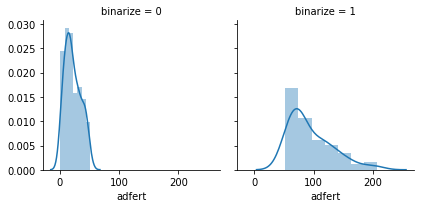

In [3]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2)
    
    grid = grid.map(sns.distplot, variable)
    
    
binarize_histogram(df, 'adfert')

## B)

In [4]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    sns.boxplot(y=variable, x=group_by, data= dataframe)

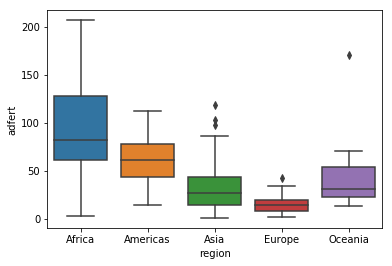

In [5]:
grouped_boxplot(df, 'adfert', 'region')

## C)

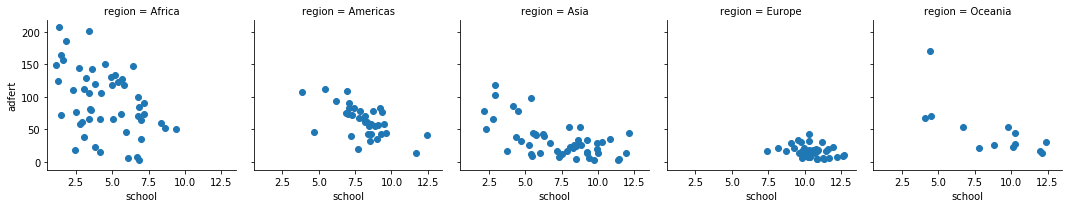

In [6]:
def grouped_scatterplot(dataframe, x, y, group_by):
    grid = sns.FacetGrid(df, col=group_by)
    grid = grid.map(plt.scatter, x, y)
grouped_scatterplot(df, 'school', 'adfert', 'region')

## 3. Genere un heatmap entre todas las variables
* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6


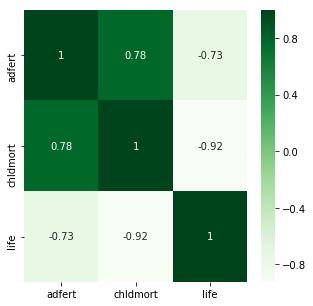

In [7]:
df3= df.loc[:,[ 'adfert', 'chldmort', 'life']]

corr_mat = df3.corr().dropna()
plt.figure(figsize=(5,5))
sns.heatmap(df3.corr(), cmap='Greens', annot=True)


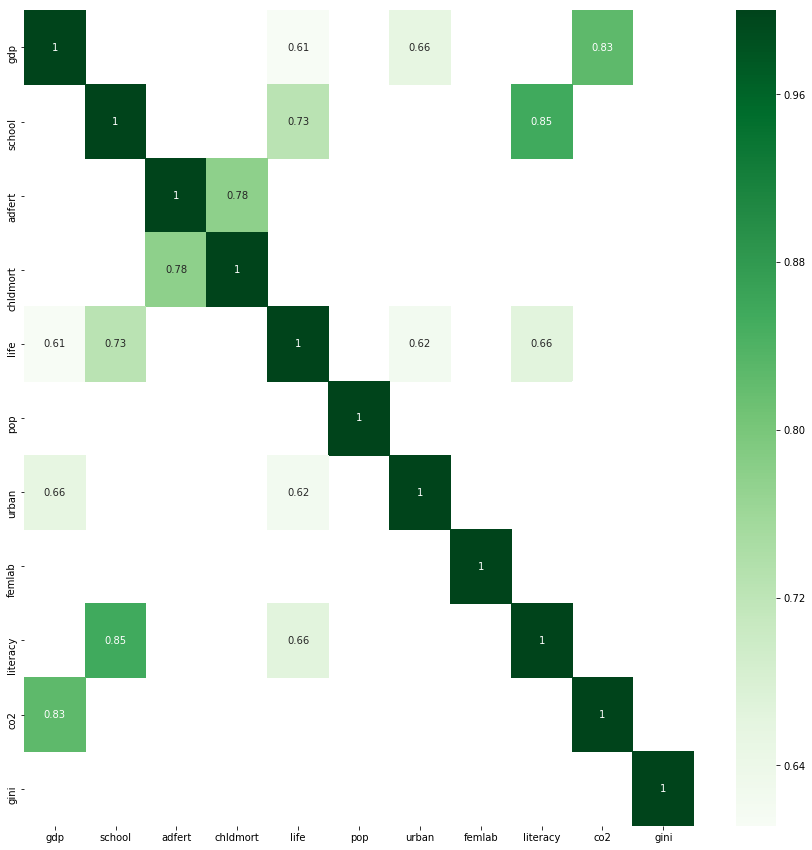

In [8]:
df2 = df.loc[:,['country', 'region', 'gdp', 'school', 'adfert',
       'chldmort', 'life', 'pop', 'urban', 'femlab', 'literacy', 'co2', 'gini']]

correlacion  = df2.corr().dropna()
correlacion2 = correlacion[correlacion>.6] 
plt.figure(figsize=(15,15))
sns.heatmap(correlacion2, cmap='Greens', annot=True)
#sns.heatmap(df2.corr(), cmap='Greens', annot=True)




# 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

* tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,['variables', 'a', 'agregar']] . No olvide agregar la variable region .
* tip: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.


In [9]:
  tmp = df.loc[:,['region', 'gdp', 'life', 'literacy', 'urban', 'chldmort', 'school']]
region_list = tmp['region'].unique().tolist()

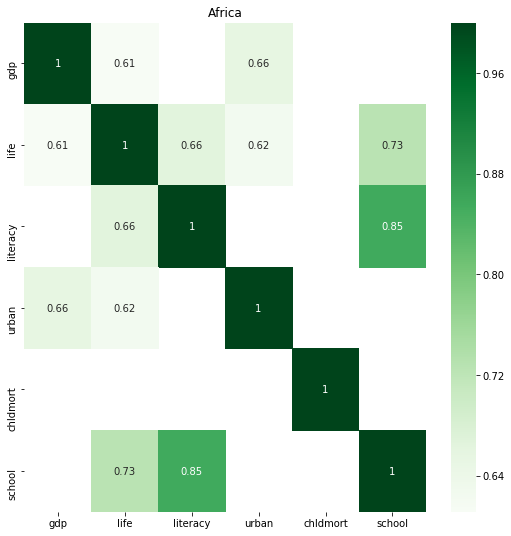

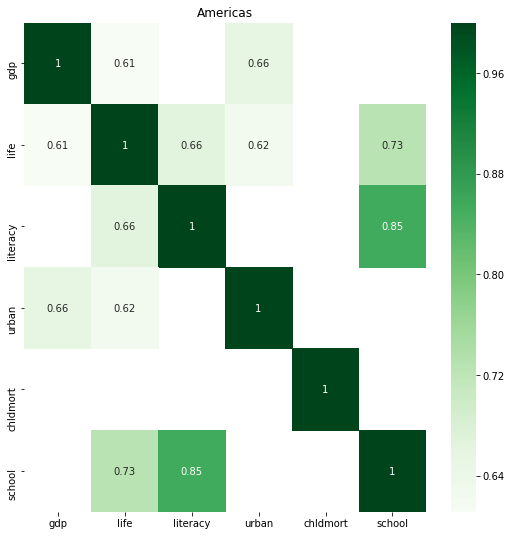

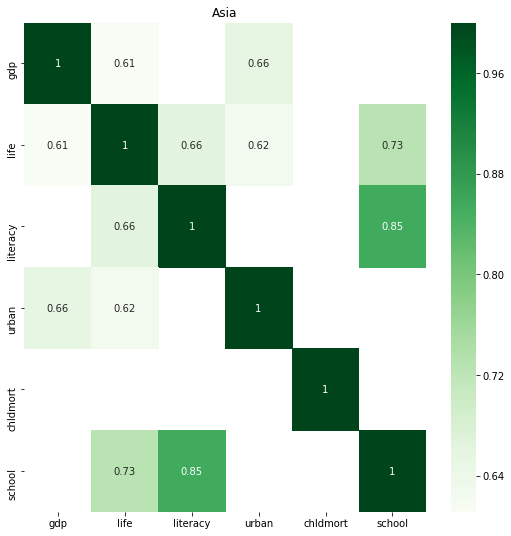

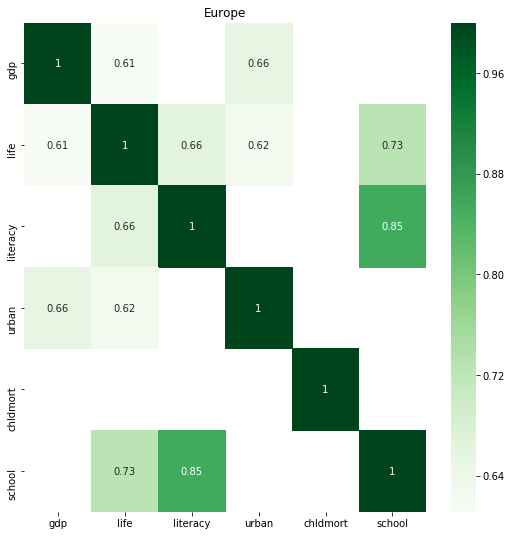

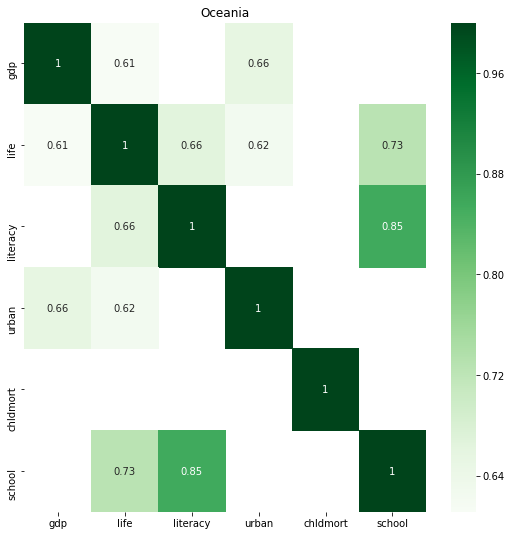

In [10]:

for i in region_list:
    
    corr  = tmp.corr().dropna()
    corr2 = corr[corr>.6] 
    plt.figure(figsize=(9,9))
    plt.title(i)
    sns.heatmap(corr2, cmap='Greens', annot=True)

In [11]:
tmp

,region,gdp,life,literacy,urban,chldmort,school
0,Africa,7300.399902,72.316666,72.599998,64.933334,34.75,6.716667
1,Africa,1338.800049,54.733334,41.700001,41.000000,122.75,3.100000
2,Africa,12307.400391,52.250000,84.099998,59.250000,60.25,8.600000
3,Africa,1063.400024,53.783333,23.600000,23.583334,170.50,1.300000
4,Africa,349.200012,48.866665,66.599998,10.250000,168.50,2.483333
5,Africa,1986.800049,50.116665,NaN,56.366665,155.00,5.650000
6,Africa,3052.199951,73.333336,84.800003,59.283333,30.00,3.500000
7,Africa,677.000000,45.933334,55.200001,38.466667,173.50,3.383333
8,Africa,1266.199951,48.566666,33.599998,26.400000,209.00,1.500000
9,Africa,1099.000000,59.783333,74.199997,28.000000,105.75,2.800000
